In [1]:
# Base import and functions

import imutils
import cv2
from imutils import contours

import sys
import os, os.path

from tqdm import tqdm

import pytesseract             # Python interface to tesseract for OCR

import numpy as np
from PIL import Image

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%load_ext line_profiler

### Prepare image

In [2]:
im = cv2.imread("test_data/IMG_0307.JPG")
# resize
newHeight = 200
newWidth = int(im.shape[1]*200/im.shape[0])
im = cv2.resize(im, (newWidth, newHeight))    

### Create Selective Search Segmentation Object using default parameters

In [5]:
def setup(im, fast=False):
    ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()

    # set input image on which we will run segmentation
    ss.setBaseImage(im)

    if fast:
        # Switch to fast but low recall Selective Search method
        ss.switchToSelectiveSearchFast()
    else:
        # Switch to high recall but slow Selective Search method
        ss.switchToSelectiveSearchQuality()
    
    return ss

### Run selective search segmentation on input image

Total Number of Region Proposals: 1634
CPU times: user 627 ms, sys: 0 ns, total: 627 ms
Wall time: 637 ms


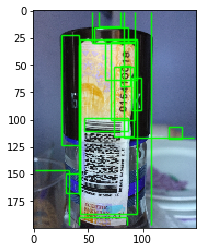

In [17]:
%%time

ss = setup(im, fast=False)
rects = ss.process()
print('Total Number of Region Proposals: {}'.format(len(rects)))

# number of region proposals to show
numShowRects = 18
# increment to increase/decrease total number
# of reason proposals to be shown
increment = 50

imOut = im.copy()

# itereate over all the region proposals
for i, rect in enumerate(rects):
    # draw rectangle for region proposal till numShowRects
    if (i < numShowRects):
        x, y, w, h = rect
        cv2.rectangle(imOut, (x, y), (x+w, y+h), (0, 255, 0), 1, cv2.LINE_AA)
    else:
        break

plt.imshow(imOut)